## Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
def prepare_df(df):
    df['target'] = df['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})
    df = df[df['target'] != 2]
    df['target'] = df['target'].replace({1: 0, 3: 1})

    return df

In [ ]:
data_path = '../data/data.csv'  
df = pd.read_csv(data_path)

df = prepare_df(df)

print("New label distribution:\n", df['target'].value_counts())

In [ ]:
X = df['features']
y = df['target']

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
nb_classifier = MultinomialNB(alpha=1)
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

print("First 10 predictions:", y_pred[:10])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

## SVM

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv")

df.head()

,features,target,comments,has_tapa,has_nurimisaki,has_kompass,has_palindrome_(variante),has_anti-queen_(variante),has_10-in-9_(variante),has_modifier_cells_(variante),...,has_tomtom,has_statue_park,has_extra_regions_(variante),has_logical,has_norinori,has_anti-knight_(variante),has_daisho,has_earthquake_(variante),has_diagonal_(variante),has_cross_the_streams
0,plato feeling unwell hypochondriac thermometer...,3,added comment work solution code,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,friend roman countryman lend ear come bury cae...,4,added roman numeral tag,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,standard yinyang rule apply,2,tougher expected star difficult puzzle maybe f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,penpastandard sudoku rule apply final numerica...,3,fun puzzle requiring tremendously wonderful va...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ring killerlittle killer sudoku wessel strijks...,3,smistry thanks glad liked thanks setting nice ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = prepare_df(df)

X = df['features']
y = df['target'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class Weights: {class_weights_dict}")

In [ ]:
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## Adjust SVM

In [55]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df = prepare_df(df)

X = df['features']
y = df['target']

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

param_grid = {
    'tfidf__max_features': [5000, 10000],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X, y)

In [ ]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df = prepare_df(df)

X = df['features']
y = df['target'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

/tmp/ipykernel_89342/2368711172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({1: 0, 3: 1})


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [60]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class Weights: {class_weights_dict}")

Class Weights: {0: np.float64(0.9548611111111112), 1: np.float64(1.049618320610687)}


In [61]:
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.81      0.74      0.77       684
        Hard       0.74      0.81      0.77       623

    accuracy                           0.77      1307
   macro avg       0.77      0.78      0.77      1307
weighted avg       0.78      0.77      0.77      1307



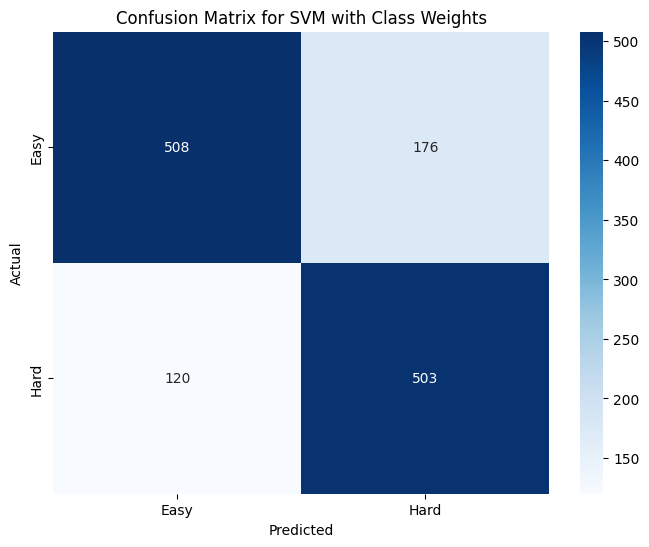

In [62]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## Adjusted SVM with binary features

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils.class_weight import compute_class_weight
from scipy.sparse import hstack
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df = prepare_df(df)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df['features'])

binary_features = df.filter(like='has').values

X = hstack([X_tfidf, binary_features])
# X = binary_features

y = df['target'].values

/tmp/ipykernel_89342/2368711172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({1: 0, 3: 1})


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"Class Weights: {class_weights_dict}")

Class Weights: {0: np.float64(0.955909257226491), 1: np.float64(1.048354735152488)}


In [76]:
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

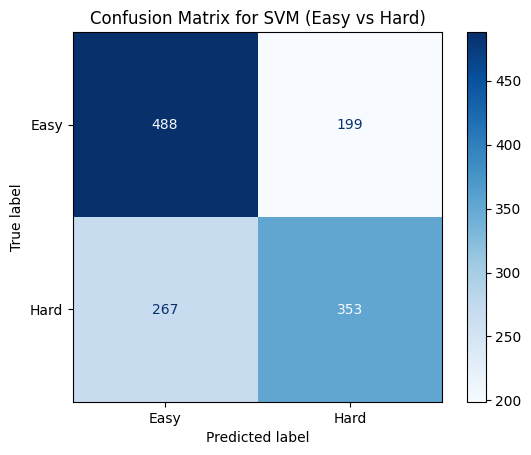

Classification Report:

              precision    recall  f1-score   support

        Easy       0.65      0.71      0.68       687
        Hard       0.64      0.57      0.60       620

    accuracy                           0.64      1307
   macro avg       0.64      0.64      0.64      1307
weighted avg       0.64      0.64      0.64      1307



In [77]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Easy', 'Hard'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM (Easy vs Hard)")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

## SVM - features + comments

/tmp/ipykernel_6606/2368711172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({1: 0, 3: 1})


Classification Report:
               precision    recall  f1-score   support

        Easy       0.82      0.74      0.78       684
        Hard       0.74      0.82      0.78       623

    accuracy                           0.78      1307
   macro avg       0.78      0.78      0.78      1307
weighted avg       0.78      0.78      0.78      1307



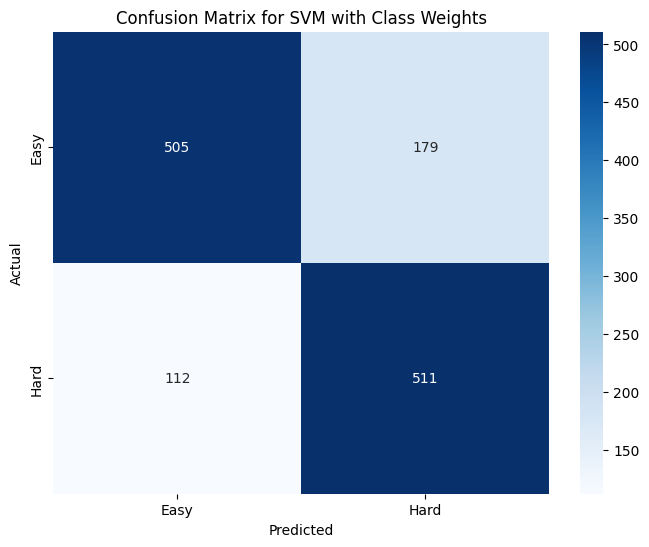

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df = prepare_df(df)

tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(df['features'])
X_tfidf_comments = tfidf_comments.fit_transform(df['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

y = df['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()


## SVM + PCA

/tmp/ipykernel_6606/2368711172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({1: 0, 3: 1})


Classification Report:
               precision    recall  f1-score   support

        Easy       0.82      0.75      0.78       684
        Hard       0.75      0.82      0.78       623

    accuracy                           0.78      1307
   macro avg       0.78      0.78      0.78      1307
weighted avg       0.78      0.78      0.78      1307



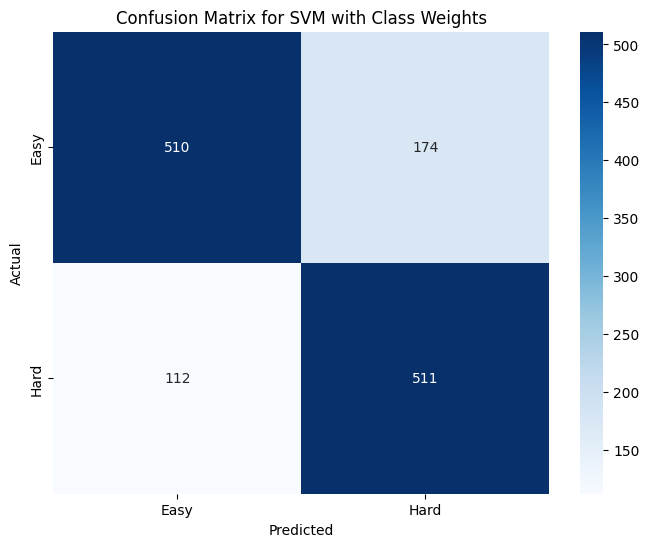

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np
from sklearn.decomposition import PCA

data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df = prepare_df(df)

tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(df['features'])
X_tfidf_comments = tfidf_comments.fit_transform(df['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

y = df['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_pca, y_train)

y_pred = svm_classifier.predict(X_test_pca)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## SVM + word_count

Classification Report:
               precision    recall  f1-score   support

        Easy       0.80      0.69      0.74       553
        Hard       0.71      0.82      0.76       520

    accuracy                           0.75      1073
   macro avg       0.76      0.76      0.75      1073
weighted avg       0.76      0.75      0.75      1073



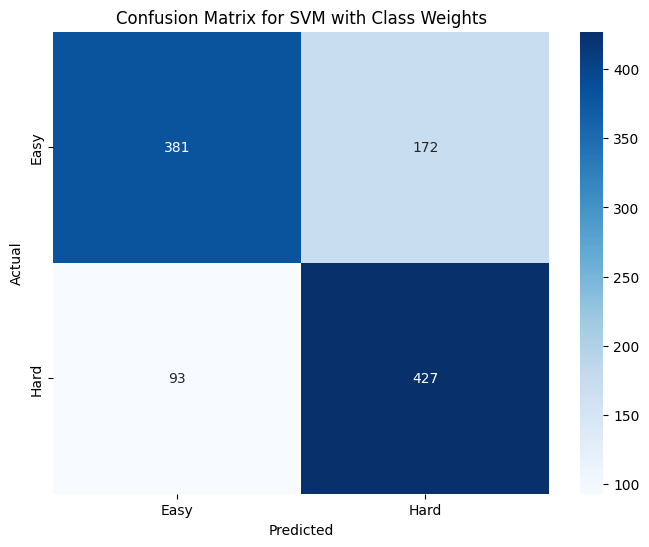

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

# Load your dataset
data_path = '../data/data_processed.csv'
df = pd.read_csv(data_path)

# Remove medium difficulty and map targets to binary (0: easy, 1: hard)
df = df[df['target'] != 2]
df['target'] = df['target'].replace({1: 0, 3: 1})

# Add word count as a feature
df['word_count'] = df['features'].apply(lambda x: len(x.split()))

# Normalize the word count feature
scaler = StandardScaler()
word_count_normalized = scaler.fit_transform(df['word_count'].values.reshape(-1, 1))

# Prepare TF-IDF for features and comments
tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(df['features'])
X_tfidf_comments = tfidf_comments.fit_transform(df['comments'].fillna(''))

# Stack the TF-IDF features and the normalized word_count feature
X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments, word_count_normalized])

# Encode the target variable
y = df['target']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train an SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()


## Checking problematic text

Classification Report:
               precision    recall  f1-score   support

        Easy       0.65      0.57      0.61       684
      Medium       0.44      0.46      0.45       694
        Hard       0.53      0.56      0.55       622

    accuracy                           0.53      2000
   macro avg       0.54      0.53      0.53      2000
weighted avg       0.54      0.53      0.53      2000



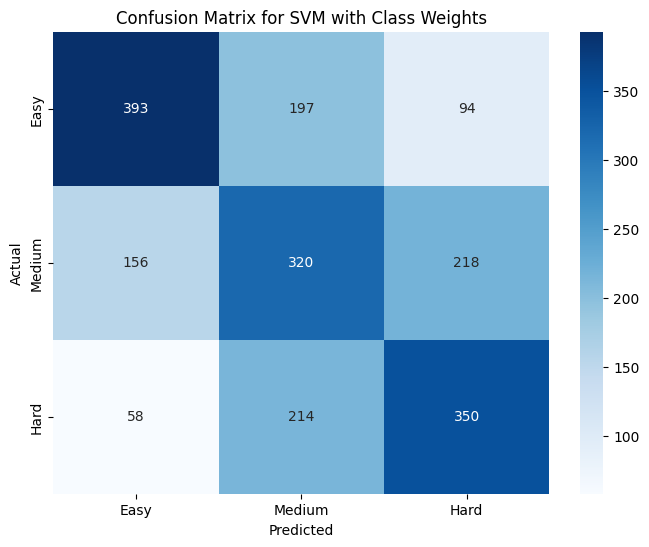


Misclassified Puzzle Descriptions:
puzzle rule normal sudoku rule apply digit may repeat cage orthogonally adjacent cell may consecutive cell separated king move knight move chess must different separate digit sum 10 separate digit sum every given cracking cryptic linkdead roman miracle link puzzlesdead roman miracle want challenge modification three original cage suggested apendleton still offer clean solve original grid accommodates solving strategy solve path link ctcdead roman miracle iii
------
puzzle created jakhob wooferzfg celebratezetamath puzzlesreaching 1000 subscriber normal irregular sudoku rule apply neighboring digit green line must differ least purple line contains set consecutive nonrepeating digit order play ctc play puzzle
------
standard sudoku rule applycells containing value exactly one greater immediate neighbour diagonal orthogonalwithintheir box shaded otherwise unshadedplay ctc cell containing value exactly one greater immediate neighbour diagonal orthogonalw

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_path = '../data/data.csv'
df = pd.read_csv(data_path)

# Preprocess target labels
df['target'] = df['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})

# Extract the text features and the target
X = df['features']  # Original text descriptions
y = df['target']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# TF-IDF vectorization of features
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test, X_train_text, X_test_text = train_test_split(
    X_tfidf, y_encoded, X, test_size=0.2, random_state=42, stratify=y_encoded
)

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Medium', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Medium', 'Hard'], yticklabels=['Easy', 'Medium', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

# Identify misclassified instances
misclassified_indices = np.where(y_test != y_pred)[0]

# Display misclassified puzzle descriptions
misclassified_descriptions = X_test_text.iloc[misclassified_indices]

print("\nMisclassified Puzzle Descriptions:")
for description in misclassified_descriptions:
    print(description)
    print("------")


## SVM - processed data

Classification Report:
               precision    recall  f1-score   support

        Easy       0.80      0.71      0.75       553
        Hard       0.72      0.82      0.77       520

    accuracy                           0.76      1073
   macro avg       0.76      0.76      0.76      1073
weighted avg       0.76      0.76      0.76      1073



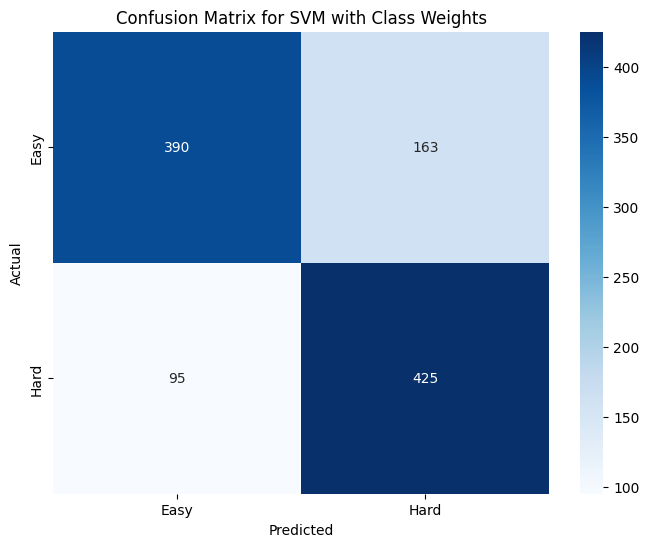

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import scipy
import numpy as np

data_path = '../data/data_processed.csv'
df = pd.read_csv(data_path)

# df = prepare_df(df)
df = df[df['target'] != 2]
df['target'] = df['target'].replace({1: 0, 3: 1})

tfidf_features = TfidfVectorizer(max_features=5000)
tfidf_comments = TfidfVectorizer(max_features=5000)

X_tfidf_features = tfidf_features.fit_transform(df['features'])
X_tfidf_comments = tfidf_comments.fit_transform(df['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_tfidf_features, X_tfidf_comments])

y = df['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()


## Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/data.csv')

df = prepare_df(df)

features = df['features']
target = df['target']

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000)
features_tfidf = vectorizer.fit_transform(features).toarray()

X_train, X_test, y_train, y_test = train_test_split(features_tfidf, target, test_size=0.3, random_state=42, stratify=target)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Neural Network

In [ ]:
import sys

src_dir = '../src'

if src_dir not in sys.path:
    sys.path.append(src_dir)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from classifier.dataloader.dataloader import create_dataloaders
from classifier.models.simple_net import NeuralNetwork

In [ ]:
torch.manual_seed(0)

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df['target'] = df['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})
df = df[df['target'] != 2]
df['target'] = df['target'].replace({1: 0, 3: 1})

X = df['features'] 
y = df['target']

tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(X)

y_tensor = torch.tensor(y.values, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tensor, test_size=0.2, random_state=42)

class PuzzleDataset(Dataset):
    def __init__(self, X, y):
        self.X = X.toarray()  
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        X_item = torch.tensor(self.X[idx], dtype=torch.float32)
        y_item = self.y[idx]
        return X_item, y_item

train_dataset = PuzzleDataset(X_train, y_train)
test_dataset = PuzzleDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

In [ ]:
learning_rate = 0.001
epochs = 5

max_features = 1e4
input_size = int(max_features)
hidden_sizes = [128, 64]
output_size = 2

model = NeuralNetwork(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    output_size=output_size
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from classifier.training_loop import train, evaluate

In [ ]:
train(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer, 
    data_loader=train_loader, 
    epochs=epochs
)

In [ ]:
average_loss, accuracy, y_pred, y_prob, y_true = evaluate(
    model=model,
    criterion=criterion,
    data_loader=test_loader
)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
print(conf_mat)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('../data/data.csv')

df['target'] = df['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})
df = df[df['target'] != 2]
df['target'] = df['target'].replace({1: 0, 3: 1})

tfidf_vectorizer = TfidfVectorizer(max_features=9830)
X = tfidf_vectorizer.fit_transform(df['features'])
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Sudoku', 'Sudoku'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

## Convolutional Neural Network

In [ ]:
import sys

src_dir = '../src'

if src_dir not in sys.path:
    sys.path.append(src_dir)

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from classifier.dataloader.dataloader import create_dataloaders
from classifier.models.simple_net import NeuralNetwork

In [36]:
torch.manual_seed(0)

In [37]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

data_path = '../data/data.csv'
df = pd.read_csv(data_path)

df['target'] = df['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})
df = df[df['target'] != 2]
df['target'] = df['target'].replace({1: 0, 3: 1})

X = df['features'] 
y = df['target']

tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(X)

y_tensor = torch.tensor(y.values, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tensor, test_size=0.2, random_state=42)

class PuzzleDataset(Dataset):
    def __init__(self, X, y):
        self.X = X.toarray()  
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        X_item = torch.tensor(self.X[idx], dtype=torch.float32)
        y_item = self.y[idx]
        return X_item, y_item

train_dataset = PuzzleDataset(X_train, y_train)
test_dataset = PuzzleDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 5225
Test dataset size: 1307


In [39]:
from classifier.models.conv_net import ConvolutionalNetwork

In [40]:
learning_rate = 0.001
epochs = 5
max_features = 1e4

num_classes = 2
input_size = int(max_features)

model = ConvolutionalNetwork(
    input_features=input_size,
    num_classes=num_classes
)

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
train(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer, 
    data_loader=train_loader, 
    epochs=epochs
)

Epoch 1/5:   0%|          | 0/164 [00:00<?, ?batch/s]

Epoch 2/5:   0%|          | 0/164 [00:00<?, ?batch/s]

Epoch 3/5:   0%|          | 0/164 [00:00<?, ?batch/s]

Epoch 4/5:   0%|          | 0/164 [00:00<?, ?batch/s]

Epoch 5/5:   0%|          | 0/164 [00:00<?, ?batch/s]

In [43]:
average_loss, accuracy, y_pred, y_prob, y_true = evaluate(
    model=model,
    criterion=criterion,
    data_loader=test_loader
)

Average Loss: 0.7542, Accuracy: 69.70%


In [44]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       687
           1       0.70      0.63      0.66       620

    accuracy                           0.70      1307
   macro avg       0.70      0.69      0.69      1307
weighted avg       0.70      0.70      0.70      1307

[[520 167]
 [229 391]]


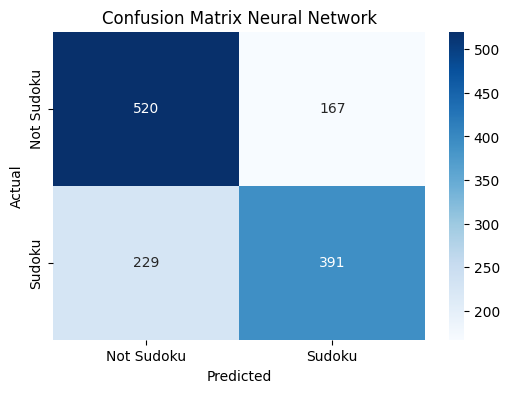

In [45]:
conf_mat = confusion_matrix(y_true, y_pred)
print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
print(conf_mat)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()